In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans les colonnes du dataframe

In [4]:
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-2]) 
current_folder

'c:/Users/eupho/OneDrive/Documents/perso/projets/classification_texte_bapteme_philo/sources'

In [5]:
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-1]) #remonter au dossier root du projet
os.chdir(path_root)
path = PureWindowsPath(os.getcwd() + "/data/input/data.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"

zeros_subset = corpus.loc[corpus["category_bin"] == 0, :]
ones_subset = corpus.loc[corpus["category_bin"] == 1, :]
number_of_minority_class = len(zeros_subset)
sampled_ones = ones_subset.sample(number_of_minority_class, random_state=42)
print(sampled_ones.shape)
corpus = pd.concat([sampled_ones, zeros_subset], ignore_index=True)
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus.index = list(range(len(corpus)))
corpus["id"] = corpus.index	#creation de l'id seulement apres equilibrage des classes et melange aleatoire
print(corpus["category_bin"].value_counts())
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

(1825, 6)
1    1825
0    1825
Name: category_bin, dtype: int64
False
False


,id,message,message_preprocessed,category,length,category_bin
0,0,"La nature humaine de Jésus peut faire tout ce qu’il voulait de naturel, selon les limites de sa nature propre.",nature humaine jésus peut faire tout voulait naturel selon limite nature propre,philosophy,111,1
1,1,"Cette question va une étape plus loin : Marie a-t-elle été sainte non seulement avant sa naissance, mais avant son existence ? Ou bien a-t-elle été conçu de façon immaculée ? Les franciscains ont-ils raison de croire en l’immaculée conception ? … Thomas d’Aquin dit non dans ce passage.",cette question va étape plus loin marie a-t-elle saint non seulement avant naissance avant existence bien a-t-elle conçu façon immaculée franciscain ont-ils raison croire immaculée conception … thomas aquin dit non passage,philosophy,289,1
...,...,...,...,...,...,...
3648,3648,"Pour l’histoire de l’eunuque, descendre et remonter dans l’eau je trouve ça ridicule, c’est pas ce que moi en tant que baptiste je dirai. Juste entre « descendre » et « monter dans l’eau » il y a bien marqué « Philippe le baptisa », et le baptiste va dire que « Philippe le baptisa » veut dire que Philippe l’a immergé dans l’eau.",histoire eunuque descendre remonter eau trouve ça ridicule tant baptiste dirai juste entre « descendre » « monter eau » a bien marqué « philippe baptisa » baptiste va dire « philippe baptisa » veut dire philippe a immergé eau,baptism,334,0
3649,3649,"Il apparaît donc juste de dire que tout corps, tout objet est constitué de deux principes : un matériel, et l’autre immatériel (ou formel).",apparaît donc juste dire tout corps tout objet constitué deux principe matériel autre immatériel formel,philosophy,140,1


In [6]:
X = corpus["message_preprocessed"]
y = corpus["category"]
# y = corpus["category_bin"]
indices = corpus["id"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)

In [7]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

hashing_vectorizer = HashingVectorizer()
X_train_hashing = hashing_vectorizer.fit_transform(X_train)

# PMI


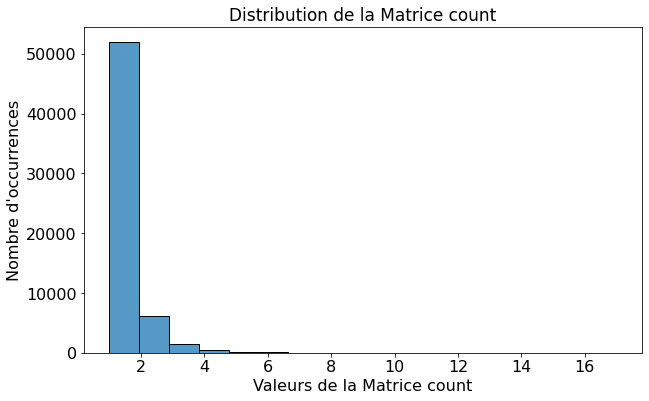

In [11]:
# Distribution des valeurs de la matrice count
path = PureWindowsPath(os.getcwd() + "\\data\\output\\count_matrix_distribution.png")
path = path.as_posix()

sb.histplot(X_train_count.data)
plt.xlabel("Valeurs de la Matrice count", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la Matrice count", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.savefig(path)
plt.show()


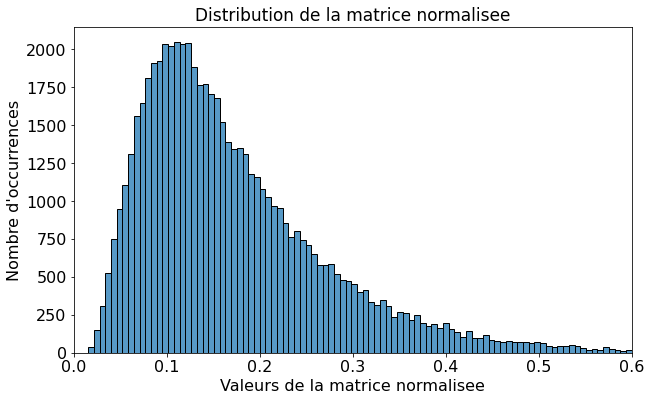

In [21]:
# Distribution des valeurs de la matrice normalization
from sklearn.preprocessing import normalize
X_train_normalized = normalize(X_train_count, norm='l2', axis=1) #normalisation par ligne

path = PureWindowsPath(os.getcwd() + "\\data\\output\\normalization_distribution.png")
path = path.as_posix()

sb.histplot(X_train_tfidf.data, edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la matrice normalisee", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice normalisee", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()

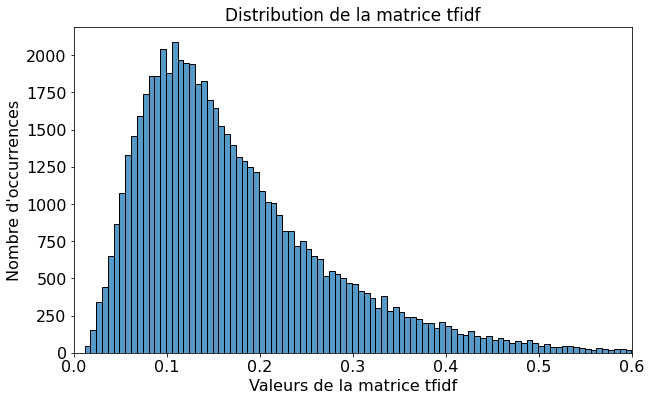

In [13]:
# Distribution des valeurs de la matrice tfidf
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_train_tfidf.data, edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()

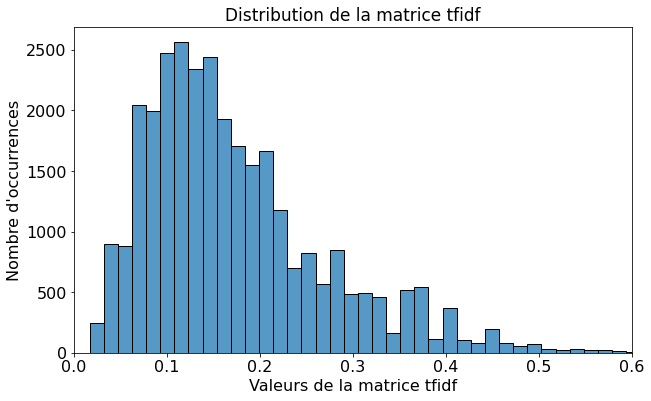

In [18]:
# Distribution des valeurs de la matrice hashing
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_train_hashing.data, edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()

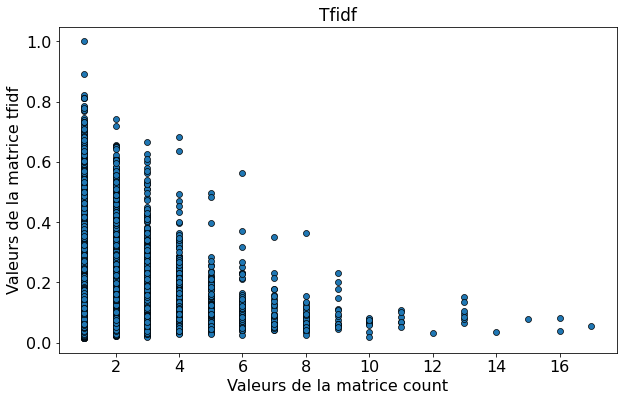

In [12]:
# Distribution matrice matrice
# Distribution des valeurs de la matrice tfidf
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_vs_count_distribution.png")
path = path.as_posix()

sb.scatterplot(x=X_train_count.data, y=X_train_tfidf.data, edgecolor="black", linewidth=0.7)
plt.xlabel("Valeurs de la matrice count", size=16)
plt.ylabel("Valeurs de la matrice tfidf", size=16)
plt.title("Tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()

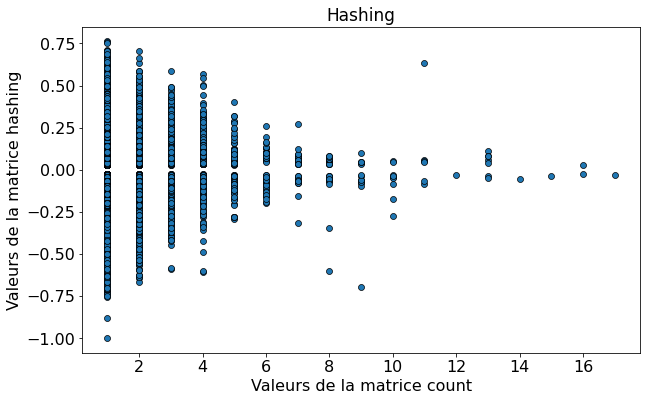

In [15]:
# Distribution matrice matrice
# Distribution des valeurs de la matrice hashing
path = PureWindowsPath(os.getcwd() + "\\data\\output\\hashing_vs_count_distribution.png")
path = path.as_posix()

sb.scatterplot(x=X_train_count.data, y=X_train_hashing.data, edgecolor="black", linewidth=0.7)
plt.xlabel("Valeurs de la matrice count", size=16)
plt.ylabel("Valeurs de la matrice hashing", size=16)
plt.title("Hashing", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()